In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
import glob

In [2]:
data = pd.read_csv('AGNobsdata/4FGL_J1555.7+1111_daily_10_06_2024.csv')
data = data.rename(columns={'Photon Flux [0.1-100 GeV](photons cm-2 s-1)':'PhotonFlux', 'Photon Flux Error(photons cm-2 s-1)':'PhotonFluxErr', 'Julian Date': 'JD'})

data = data[~data['PhotonFlux'].str.contains('<', na=False)]


In [3]:
data = data.loc[(data.MET>239716801) & (data.MET<=638767517)]

In [4]:
flux = data.PhotonFlux.astype(float)
fluxerr = data.PhotonFluxErr.astype(float)

logflux = np.log(data.PhotonFlux.astype(float))
logfluxerr = data.PhotonFluxErr.astype(float)/data.PhotonFlux.astype(float)



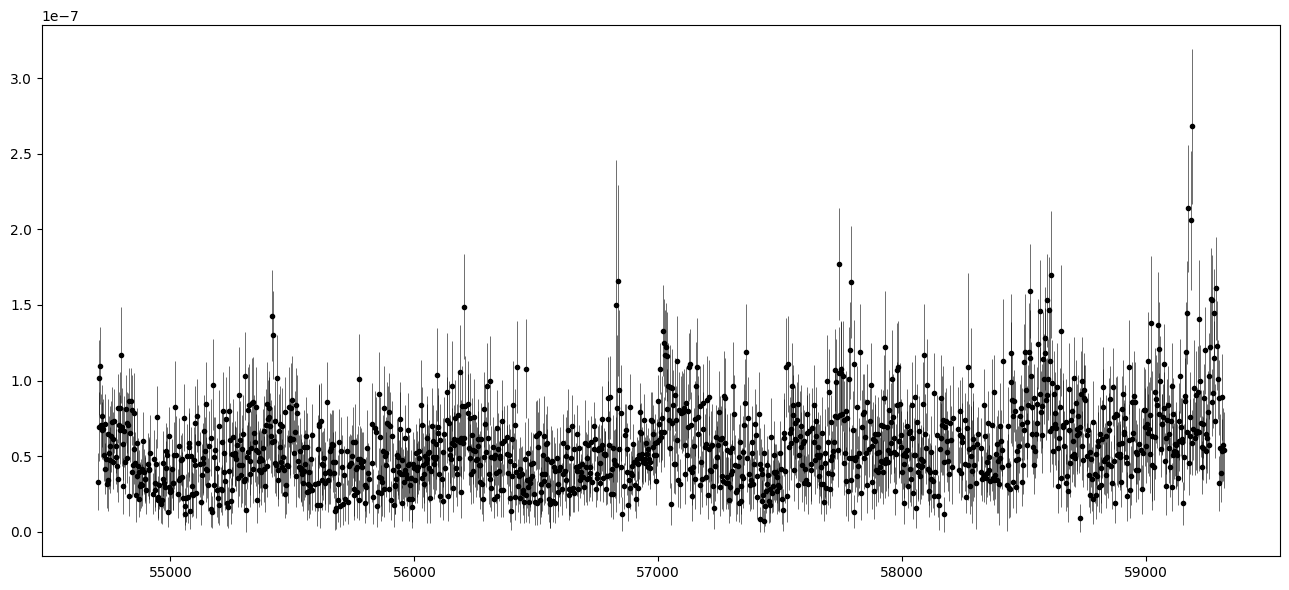

In [5]:
plt.figure(figsize=[13, 6])
plt.errorbar(data.JD.astype('float')-2399985.0, flux , yerr= fluxerr, fmt = '.', ecolor='black', elinewidth=0.4, color='k' )
plt.tight_layout()




In [6]:

def bin_time_series_with_errors(time, values, errors, bin_width, agg_func=np.mean):
    """
    Bin a time series with associated values and errors into bins of specified width.

    Parameters:
    time (array-like): Array of time points.
    values (array-like): Array of values corresponding to the time points.
    errors (array-like): Array of errors corresponding to the values.
    bin_width (float): Width of each bin in the units of time.
    agg_func (function, optional): Aggregation function for the values within each bin (default is np.mean).

    Returns:
    tuple: Tuple containing arrays of binned times, binned values, and binned errors.
    """
    
    if len(time) != len(values) or len(values) != len(errors):
        raise ValueError("The length of time, values, and errors arrays must be the same")

    # Calculate the bin edges based on the bin width
    min_time = np.min(time)
    max_time = np.max(time)
    bin_edges = np.arange(min_time, max_time + bin_width, bin_width)

    # Digitize the time array to find the bin index for each time value
    bin_indices = np.digitize(time, bin_edges) - 1

    # Initialize arrays to hold the binned data
    binned_time = (bin_edges[:-1] + bin_edges[1:]) / 2  # Middle of each bin
    binned_values = np.zeros(len(binned_time))
    binned_errors = np.zeros(len(binned_time))

    # Aggregate the values and errors within each bin
    for i in range(len(binned_time)):
        bin_mask = (bin_indices == i)
        if np.any(bin_mask):
            binned_values[i] = agg_func(values[bin_mask])
            binned_errors[i] = np.sqrt(np.sum(errors[bin_mask]**2)) / np.sum(bin_mask)
        else:
            binned_values[i] = np.nan  # Handle empty bins
            binned_errors[i] = np.nan

    return binned_time, binned_values, binned_errors


In [7]:
binned_time, binned_flux, binned_fluxerr = bin_time_series_with_errors(data.JD.astype('float')-2399985.0, flux, fluxerr, 30, np.mean)
#binned_time, binned_fluxerr = bin_time_series(data.JD.astype('float')-2399985.0, logfluxerr, 30, np.mean)
#pd.DataFrame({'time':(binned_time - binned_time[0])/365, 'flux':binned_flux/1e-8, 'fluxerr':binned_fluxerr/1e-8}).to_csv('AGNobsdata/PG1553_113.txt', header=False, index=False)

In [8]:
med_cor_flux = (binned_flux)
med_cor_fluxerr = binned_fluxerr
med_cor_time = binned_time - binned_time[0]

/var/tmp/puthusserilanilkumar/ipykernel_2695349/474492744.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


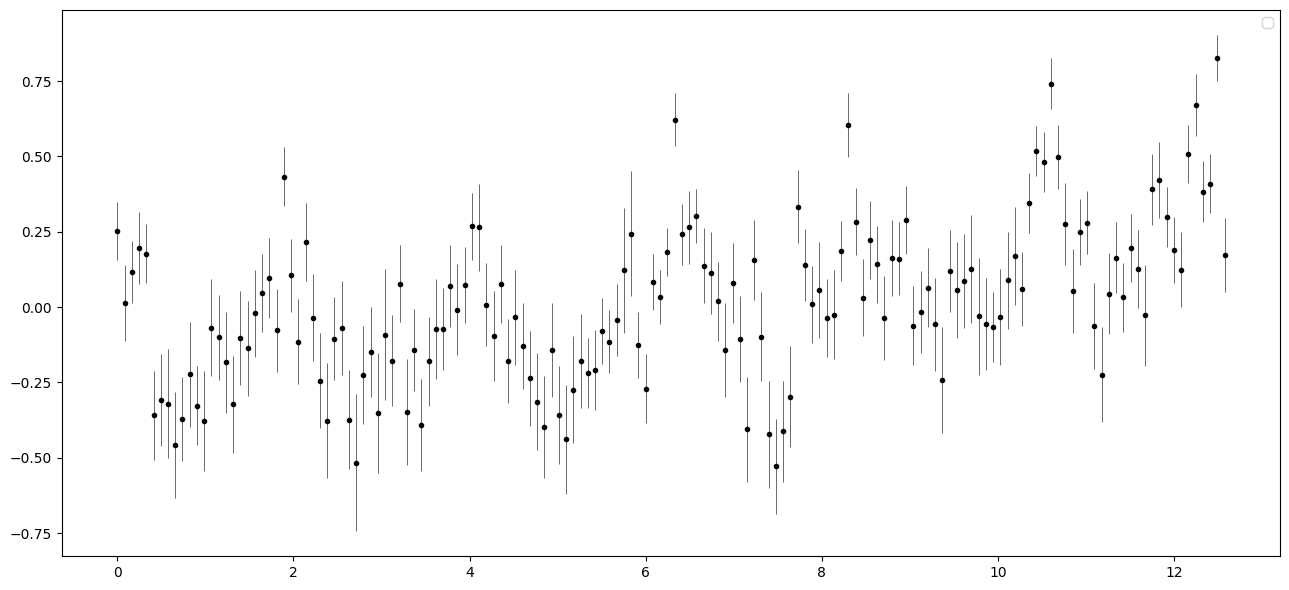

In [10]:
plt.figure(figsize=[13, 6])


# Plot data with error bars
plt.errorbar(med_cor_time/365, np.log(med_cor_flux) - np.median(np.log(med_cor_flux))  , yerr= med_cor_fluxerr/med_cor_flux, fmt = '.', ecolor='black', elinewidth=0.41, color='k' )
plt.legend()
plt.tight_layout()

plt.show()



# FERMI analysis

In [99]:

def bin_time_series_with_errors(time, values, errors, bin_width, agg_func=np.mean):
    """
    Bin a time series with associated values and errors into bins of specified width.

    Parameters:
    time (array-like): Array of time points.
    values (array-like): Array of values corresponding to the time points.
    errors (array-like): Array of errors corresponding to the values.
    bin_width (float): Width of each bin in the units of time.
    agg_func (function, optional): Aggregation function for the values within each bin (default is np.mean).

    Returns:
    tuple: Tuple containing arrays of binned times, binned values, and binned errors.
    """
    
    if len(time) != len(values) or len(values) != len(errors):
        raise ValueError("The length of time, values, and errors arrays must be the same")

    # Calculate the bin edges based on the bin width
    min_time = np.min(time)
    max_time = np.max(time)
    bin_edges = np.arange(min_time, max_time + bin_width, bin_width)

    # Digitize the time array to find the bin index for each time value
    bin_indices = np.digitize(time, bin_edges) - 1

    # Initialize arrays to hold the binned data
    binned_time = (bin_edges[:-1] + bin_edges[1:]) / 2  # Middle of each bin
    binned_values = np.zeros(len(binned_time))
    binned_errors = np.zeros(len(binned_time))

    # Aggregate the values and errors within each bin
    nan_array = []
    for i in range(len(binned_time)):
        bin_mask = (bin_indices == i)
        if np.any(bin_mask):
            binned_values[i] = agg_func(values[bin_mask])
            binned_errors[i] = np.sqrt(np.sum(errors[bin_mask]**2)) / np.sum(bin_mask)
        else:
            binned_values[i] = np.nan  # Handle empty bins
            binned_errors[i] = np.nan
            nan_array.append(i)
           
        
    binned_time = np.delete(binned_time, nan_array)
    binned_values = np.delete(binned_values, nan_array)
    binned_errors = np.delete(binned_errors, nan_array)
            #binned_values[i] = np.nan  # Handle empty bins
            #binned_errors[i] = np.nan

    return binned_time, binned_values, binned_errors


In [109]:
FERMI_filenames = glob.glob('AGNobsdata/4FGL*.csv')

In [110]:
for val in FERMI_filenames[0:]:
    data = pd.read_csv(val)
    data = data.rename(columns={'Photon Flux [0.1-100 GeV](photons cm-2 s-1)':'PhotonFlux', 'Photon Flux Error(photons cm-2 s-1)':'PhotonFluxErr', 'Julian Date': 'JD'})

    data = data[~data['PhotonFlux'].str.contains('<', na=False)]
    
    data = data.loc[(data.MET>239716801) & (data.MET<=638767517)]
    
    JD = data.JD.astype('float').to_numpy()-data.JD.astype('float').to_numpy()[0]
    flux = data.PhotonFlux.astype(float).to_numpy()
    fluxerr = data.PhotonFluxErr.astype(float).to_numpy()
    
    binned_time, binned_flux, binned_fluxerr = bin_time_series_with_errors(JD, flux, fluxerr, 30, np.mean)
    
    med_cor_flux = binned_flux
    med_cor_fluxerr = binned_fluxerr
    med_cor_time = binned_time - binned_time[0]
    
    pd.DataFrame({'time':med_cor_time/365, 'flux':np.log(med_cor_flux), 'fluxerr':med_cor_fluxerr/med_cor_flux}).to_csv(val[:28]+'.txt', sep =' ', header=False, index=False)
    print(val)
    


AGNobsdata/4FGL_J0043.8+3425_daily_10_06_2024.csv
AGNobsdata/4FGL_J0210.7-5101_daily_10_06_2024.csv
AGNobsdata/4FGL_J0211.2+1051_daily_10_06_2024.csv
AGNobsdata/4FGL_J0303.4-2407_daily_10_06_2024.csv
AGNobsdata/4FGL_J0428.6-3756_daily_10_06_2024.csv
AGNobsdata/4FGL_J0449.4-4350_daily_10_06_2024.csv
AGNobsdata/4FGL_J0457.0-2324_daily_10_06_2024.csv
AGNobsdata/4FGL_J0501.2-0158_daily_10_06_2024.csv
AGNobsdata/4FGL_J0521.7+2112_daily_10_06_2024.csv
AGNobsdata/4FGL_J0721.9+7120_daily_10_06_2024.csv
AGNobsdata/4FGL_J0808.2-0751_daily_10_06_2024.csv
AGNobsdata/4FGL_J0811.4+0146_daily_10_06_2024.csv
AGNobsdata/4FGL_J0818.2+4222_daily_10_06_2024.csv
AGNobsdata/4FGL_J1146.9+3958_daily_10_06_2024.csv
AGNobsdata/4FGL_J1248.3+5820_daily_10_06_2024.csv
AGNobsdata/4FGL_J1303.0+2434_daily_10_06_2024.csv
AGNobsdata/4FGL_J1454.4+5124_daily_10_06_2024.csv
AGNobsdata/4FGL_J1555.7+1111_daily_10_06_2024.csv
AGNobsdata/4FGL_J1649.4+5235_daily_10_06_2024.csv
AGNobsdata/4FGL_J1903.2+5540_daily_10_06_2024.csv


In [13]:
glob.glob('AGNobsdata/4FGL_*.txt')

['AGNobsdata/4FGL_J0211.2+1051.txt',
 'AGNobsdata/4FGL_J0043.8+3425.txt',
 'AGNobsdata/4FGL_J0210.7-5101.txt',
 'AGNobsdata/4FGL_J0303.4-2407.txt',
 'AGNobsdata/4FGL_J0428.6-3756.txt',
 'AGNobsdata/4FGL_J0449.4-4350.txt',
 'AGNobsdata/4FGL_J0457.0-2324.txt',
 'AGNobsdata/4FGL_J0501.2-0158.txt',
 'AGNobsdata/4FGL_J0521.7+2112.txt',
 'AGNobsdata/4FGL_J0721.9+7120.txt',
 'AGNobsdata/4FGL_J0808.2-0751.txt',
 'AGNobsdata/4FGL_J0811.4+0146.txt',
 'AGNobsdata/4FGL_J0818.2+4222.txt',
 'AGNobsdata/4FGL_J1146.9+3958.txt',
 'AGNobsdata/4FGL_J1248.3+5820.txt',
 'AGNobsdata/4FGL_J1303.0+2434.txt',
 'AGNobsdata/4FGL_J1454.4+5124.txt',
 'AGNobsdata/4FGL_J1555.7+1111.txt',
 'AGNobsdata/4FGL_J1649.4+5235.txt',
 'AGNobsdata/4FGL_J1903.2+5540.txt',
 'AGNobsdata/4FGL_J2056.2-4714.txt',
 'AGNobsdata/4FGL_J2158.8-3013.txt',
 'AGNobsdata/4FGL_J2202.7+4216.txt',
 'AGNobsdata/4FGL_J2258.1-2759.txt']

In [10]:
time, flux, fluxerr = np.loadtxt('AGNobsdata/4FGL_J0043.8+3425.txt').T

<ErrorbarContainer object of 3 artists>

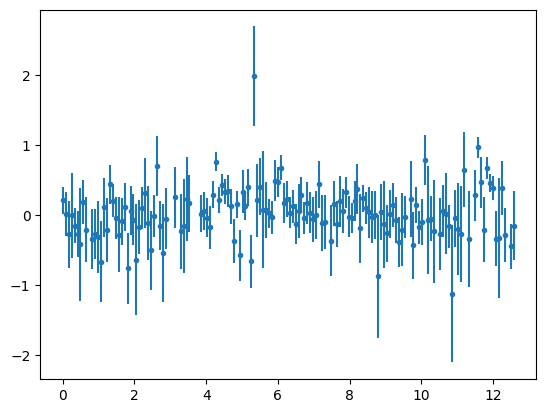

In [12]:
plt.errorbar(time, flux- np.median(flux), yerr=fluxerr, fmt='.')

In [9]:
from scipy.optimize import curve_fit


Slope (a): 0.03860315948408213 ± 0.002771639181557555
Intercept (b): -0.1637812739758957 ± 0.021528204882717988


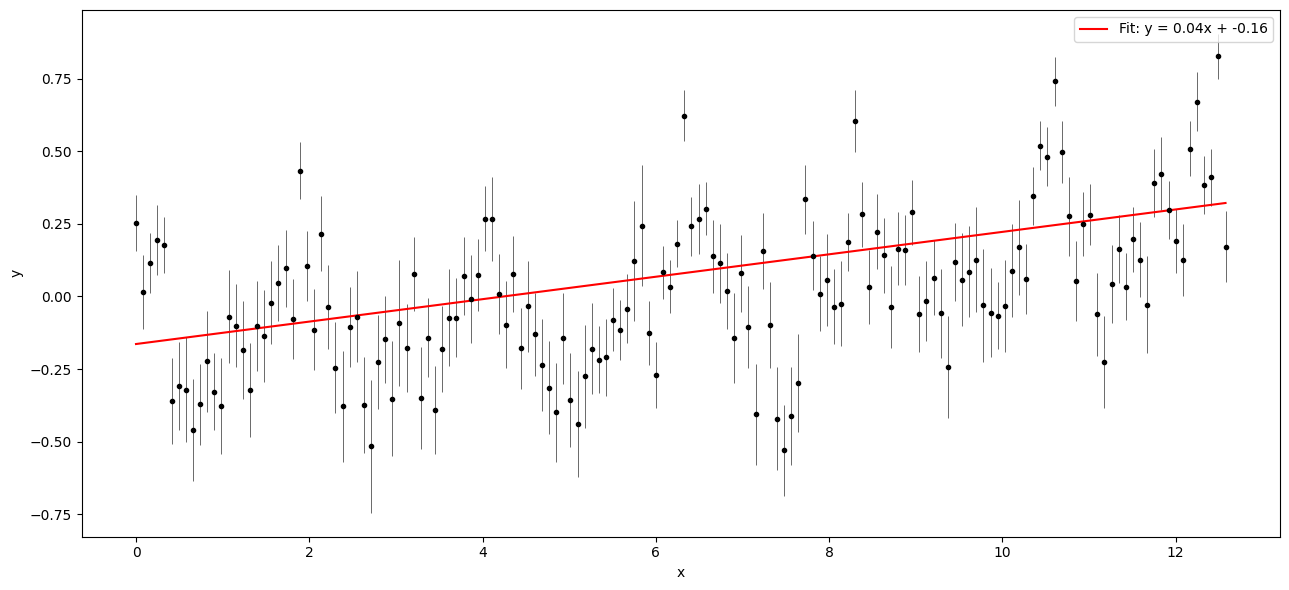

In [25]:
plt.figure(figsize=[13, 6])

x = (binned_time - binned_time[0])/365
y = np.log(binned_flux) - np.median(np.log(binned_flux))
errors = binned_fluxerr/binned_flux

# Define the model function
def linear_model(x, a, b):
    return a * x + b

# Perform weighted least squares regression
popt, pcov = curve_fit(linear_model, x, y, sigma=errors, absolute_sigma=True)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))

# Print the fit parameters
print(f"Slope (a): {a} ± {a_err}")
print(f"Intercept (b): {b} ± {b_err}")

# Plot data with error bars
#plt.errorbar(binned_time- binned_time[0], (binned_flux/linear_model(x, a, b)) , yerr= binned_fluxerr/linear_model(x, a, b), fmt = '.', ecolor='black', elinewidth=0.41, color='k' )
plt.errorbar(x, y, yerr = errors,  fmt = '.', ecolor='black', elinewidth=0.41, color='k')
plt.plot(x, linear_model(x, a, b), 'r-', label=f'Fit: y = {a:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()

plt.show()



In [25]:
pd.DataFrame({'time':binned_time - binned_time[0], 'flux': (binned_flux-linear_model(x, a, b))/1e-8, 'fluxerr':binned_fluxerr/1e-8}).to_csv('AGNobsdata/PG1553_113_lin_corrected.txt', header=False, index=False)